In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_excel("C:/Users/DELL/Desktop/Full Stack Data Science/Projects/Flight Prediction/Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

## Automatic EDA

In [4]:
#import pandas_profiling as pf

In [5]:
#pf.ProfileReport(data)

## Manual EDA

In [6]:
data.shape # check the shape of the data

(10683, 11)

In [7]:
data.dtypes # check the data types

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
data.isnull().sum() # check for missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.dropna(inplace=True) # drop missing values subce there are only 2 missing values in our data

In [10]:
data.isnull().sum() # check to confirm that we do not have any missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

### Converting date of journey to datetime format and extracting the day and month of the journey

In [11]:
# convert the date_of_journey to date format

data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Day_of_journey'] = (data['Date_of_Journey']).dt.day
data['Month_of_journey'] = (data['Date_of_Journey']).dt.month

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Pro

In [12]:
# # drop the date_of_journey columns since we have extracted the day and the month

# data.drop('Date_of_Journey', axis=1, inplace=True)
# data.head(3)

### Converting the departure time to datetime format and extracting deparutre hour and minute

In [13]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Dep_Hour'] = data['Dep_Time'].dt.hour
data['Dep_Min']  = data['Dep_Time'].dt.minute

# # drop the Dep_Time column
# data.drop('Dep_Time', axis=1, inplace=True)
# data.head()

### Converting the arrival time to datetime format and extracting arrival hour and minute

In [14]:
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data['Arrival_Hour'] = data['Arrival_Time'].dt.hour
data['Arrival_Min']  = data['Arrival_Time'].dt.minute

# # drop the Dep_Time column
# data.drop('Arrival_Time', axis=1, inplace=True)
# data.head()

### Converting the duration time to datetime format and extracting duration hour and minute

In [15]:
duration = data['Duration'].str.split(' ', expand=True) # split the dutation column into hour and minute respectively
duration[1].fillna('00m', inplace=True) # fill null values for rows with missing minute values
data['Duration_Min'] = duration[1].apply(lambda x: x[:-1]) # extract only the numbers (minute) from the minute column
data['Duration_Hour'] = duration[0].apply(lambda x: x[:-1]) # extract only the numbers (hour) from the hour column

# drop the duration column

# data.drop('Duration', axis=1, inplace=True)
# data.head(3)

## Count of the Airlines

In [16]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Airline vs Price

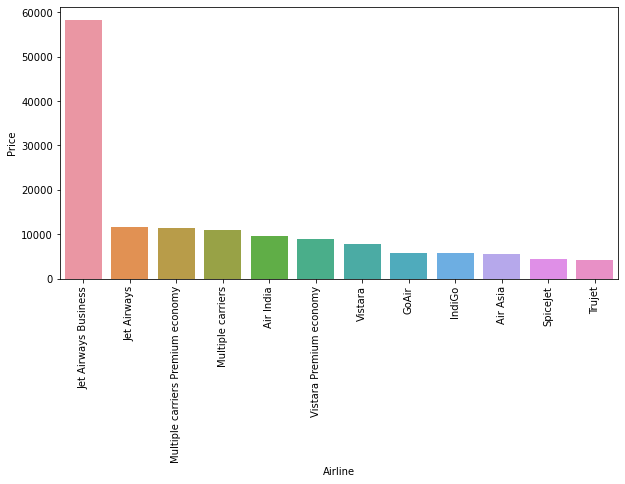

In [17]:
air_prices = pd.DataFrame(data.groupby(by='Airline')['Price'].mean().sort_values(ascending=False))
plt.figure(figsize=(10,5))
sns.barplot(data=air_prices, x=air_prices.index, y='Price')
plt.xticks(rotation=90);

## Price  based on the number of stops

In [18]:
# group the airline price according to the airline and the numner of stops
no_of_stops = pd.DataFrame(data.groupby(by=['Airline','Total_Stops'])['Price'].mean())
no_of_stops

Price
Airline                           Total_Stops              
Air Asia                          1 stop        7078.325581
                                  2 stops       6341.888889
                                  non-stop      4492.331492
Air India                         1 stop        9041.509259
                                  2 stops      12092.779101
                                  3 stops      12208.054054
                                  4 stops      17686.000000
                                  non-stop      5605.326139
GoAir                             1 stop        6884.676471
                                  non-stop      4726.173913
IndiGo                            1 stop        7104.717528
                                  2 stops       7507.526316
                                  non-stop      4731.174053
Jet Airways                       1 stop       12512.741223
                                  2 stops      13387.247467
                                  non-stop      6175.078652
Jet Airways Business              1 stop       62844.250000
                                  2 stops      49387.500000
Multiple carriers                 1 stop       10711.316157
                                  2 stops      14809.395349
                                  3 stops      17292.750000
Multiple carriers Premium economy 1 stop       11418.846154
SpiceJet                          1 stop        6750.560811
                                  non-stop      3805.423881
Trujet                            1 stop        4140.000000
Vistara                           1 stop        9641.148837
                                  non-stop      6293.954545
Vistara Premium economy           non-stop      8962.333333

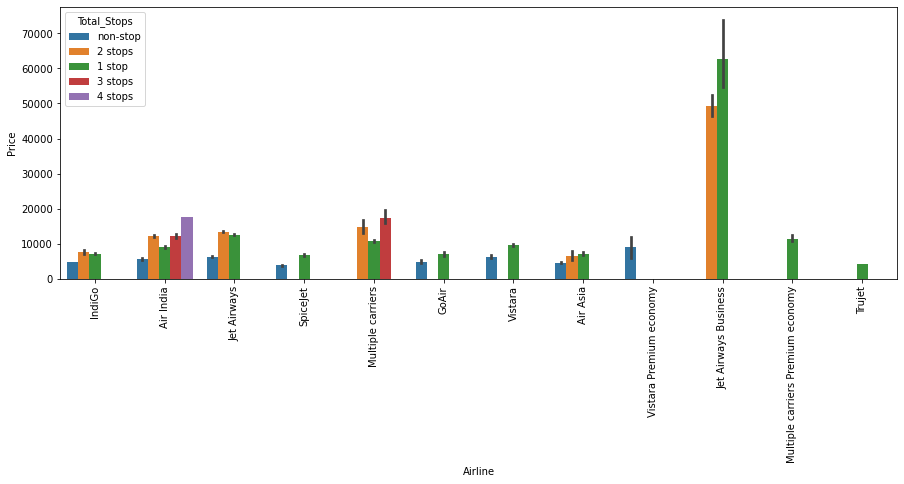

In [19]:
# plot the graph
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='Airline', y='Price', hue='Total_Stops')
plt.xticks(rotation=90);

## Source vs Price

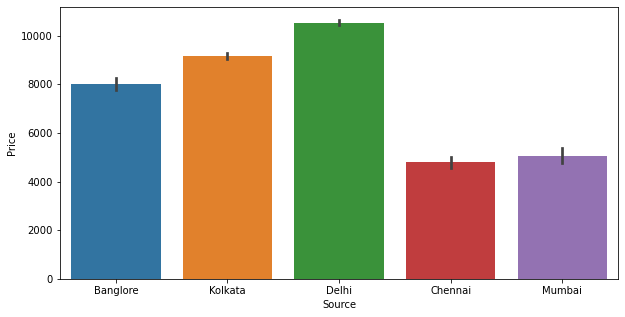

In [20]:
# plot a graph  of source against prices
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='Source', y=data['Price']);

## Destination vs Price

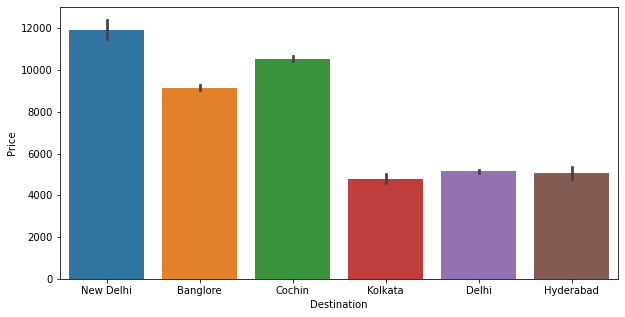

In [21]:
# plot a graph  of destination against prices
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='Destination', y=data['Price']);

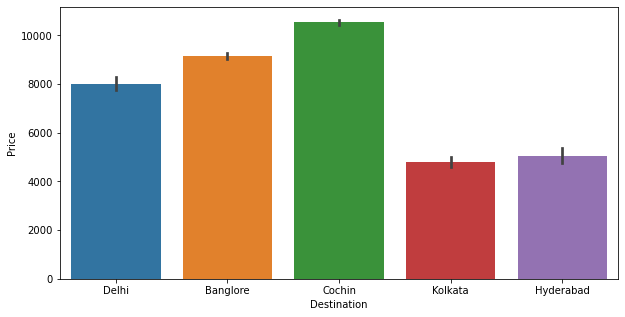

In [22]:
# replace New Delhi with Delhi since they are the same
data['Destination']=data['Destination'].str.replace('New Delhi', 'Delhi')
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='Destination', y=data['Price']);

## Handling Categorical Variables

In [23]:
# we replace the total stops by values and use OneHot encoding for the source and destination variables
data['Total_Stops'] = data['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})
air_dummy = pd.get_dummies(data['Airline'], drop_first=True)
source_dest_dummy = pd.get_dummies(data[['Source','Destination']], drop_first=True)

# concatenate the air dummy and the source_dest_dummy to our original dataframe
data = pd.concat([air_dummy,source_dest_dummy,data], axis=1)

In [24]:
data.shape

(10682, 38)

In [25]:
# # we drop the Airline, Source and Destination columns
# data.drop(['Airline', 'Source', 'Destination','Route', 'Additional_Info'], axis=1, inplace=True)

In [26]:
# drop columns
data.drop(['Airline', 'Source', 'Destination', 'Arrival_Time', 'Dep_Time', 'Duration', 'Route', 'Additional_Info', 'Date_of_Journey'], axis=1, inplace=True)

In [27]:
data.shape

(10682, 29)

# Load and prepare test data

In [28]:
test_data= pd.read_excel("C:/Users/DELL/Desktop/Full Stack Data Science/Projects/Flight Prediction/Test_set.xlsx")

In [29]:
# perform all the same steps as with the train data

# convert the date_of_journey to date format
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])
test_data['Day_of_journey'] = (test_data['Date_of_Journey']).dt.day
test_data['Month_of_journey'] = (test_data['Date_of_Journey']).dt.month


# change the format of the departure time to datetime format and drop the departure column
test_data['Dep_Time'] = pd.to_datetime(test_data['Dep_Time'])
test_data['Dep_Hour'] = test_data['Dep_Time'].dt.hour
test_data['Dep_Min']  = test_data['Dep_Time'].dt.minute
#test_data.drop('Dep_Time', axis=1, inplace=True)


# change the format of the arrival time to datetime format and drop the arrival column
test_data['Arrival_Time'] = pd.to_datetime(test_data['Arrival_Time'])
test_data['Arrival_Hour'] = test_data['Arrival_Time'].dt.hour
test_data['Arrival_Min']  = test_data['Arrival_Time'].dt.minute
#test_data.drop('Arrival_Time', axis=1, inplace=True)


# Converting the duration time to datetime format and extracting duration hour and minute
duration = test_data['Duration'].str.split(' ', expand=True) # split the dutation column into hour and minute respectively
duration[1].fillna('00m', inplace=True) # fill null values for rows with missing minute values
test_data['Duration_Min'] = duration[1].apply(lambda x: x[:-1]) # extract only the numbers (minute) from the minute column
test_data['Duration_Hour'] = duration[0].apply(lambda x: x[:-1]) # extract only the numbers (hour) from the hour column
#test_data.drop('Duration', axis=1, inplace=True)

# replace New Delhi with Delhi since they are the same
test_data['Destination']=test_data['Destination'].str.replace('New Delhi', 'Delhi')


# Handling categorical variables
# we replace the total stops by values and use OneHot encoding for the source and destination variables
test_data['Total_Stops'] = test_data['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})
test_air_dummy = pd.get_dummies(test_data['Airline'], drop_first=True)
test_source_dest_dummy = pd.get_dummies(test_data[['Source','Destination']], drop_first=True)

# concatenate the air dummy and the source_dest_dummy to our original dataframe
test_data = pd.concat([test_air_dummy,test_source_dest_dummy,test_data], axis=1)

# drop the Airline, Source, Arrival, Destination, Duration, Route and Additional Info columns
test_data.drop(['Airline', 'Source', 'Destination', 'Arrival_Time', 'Dep_Time', 'Duration', 'Route', 'Additional_Info', 'Date_of_Journey'], axis=1, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/03/2019' in DD/MM/YYYY format. Pro

In [30]:
print(data.shape)
print(test_data.shape)

(10682, 29)
(2671, 27)


In [31]:
# split the data into dependen and independet variables
x = data.drop('Price', axis=1)
y = data['Price']

# Model Building and Hyparameter Tuning
## ExtraTreesRegressor

In [ ]:
# convert all the columns of the data into integers
for i in x.columns:
    x[i] = x[i].astype(int)

In [51]:
# split our data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=50)

In [33]:
#  bulding the ectra tree regressor

from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
ET_model = ExtraTreesRegressor(n_estimators=120)
ET_model.fit(x_train, y_train)
y_pred = ET_model.predict(x_test)

print(r2_score(y_test, y_pred))

0.7703679348222048


In [34]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)
print(r2_score(y_test, y_pred))

0.7933626714968406


## Hyperparameter Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV

# perform hyperparameter on random forest model
n_estimators = [int(x) for x in np.linspace(start=80, stop=1500, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num=5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

rand_grid = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth':max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor()
rfcv = RandomizedSearchCV(estimator=rf, param_distributions=rand_grid, n_iter=10, cv=5, n_jobs=1, random_state=42, verbose=1, scoring='neg_mean_squared_error')

# train the model on the using the best paramters from the model
rfcv.fit(x_train, y_train)

# predict using the rfcv model
y_pred = rfcv.predict(x_test)

print(r2_score(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.8061826063669305


In [39]:
# building a catboositng regressor
from catboost import CatBoostRegressor

CAT_model = CatBoostRegressor()
CAT_model.fit(x_train, y_train)
CAT_pred = CAT_model.predict(x_test)
print(r2_score(y_pred, CAT_pred))

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 16.6ms	remaining: 16.6s
1:	learn: 4317.7245126	total: 31.2ms	remaining: 15.6s
2:	learn: 4170.6312697	total: 44.8ms	remaining: 14.9s
3:	learn: 4037.1104033	total: 56.8ms	remaining: 14.1s
4:	learn: 3911.7553315	total: 69.7ms	remaining: 13.9s
5:	learn: 3789.9259184	total: 83.3ms	remaining: 13.8s
6:	learn: 3678.1357093	total: 97.5ms	remaining: 13.8s
7:	learn: 3584.3769337	total: 110ms	remaining: 13.7s
8:	learn: 3493.9859378	total: 123ms	remaining: 13.6s
9:	learn: 3408.5019954	total: 137ms	remaining: 13.6s
10:	learn: 3330.5292970	total: 150ms	remaining: 13.5s
11:	learn: 3254.5897055	total: 165ms	remaining: 13.6s
12:	learn: 3190.1607524	total: 179ms	remaining: 13.6s
13:	learn: 3128.5772269	total: 199ms	remaining: 14s
14:	learn: 3065.0804760	total: 214ms	remaining: 14.1s
15:	learn: 3013.0375353	total: 227ms	remaining: 14s
16:	learn: 2964.1479058	total: 240ms	remaining: 13.9s
17:	learn: 2921.2624613	total: 252ms	remaining: 13.8s
18:	l

168:	learn: 1934.9066940	total: 1.86s	remaining: 9.16s
169:	learn: 1931.5952373	total: 1.87s	remaining: 9.15s
170:	learn: 1928.6900947	total: 1.89s	remaining: 9.15s
171:	learn: 1927.5310549	total: 1.9s	remaining: 9.12s
172:	learn: 1926.6183711	total: 1.9s	remaining: 9.1s
173:	learn: 1924.1950863	total: 1.92s	remaining: 9.09s
174:	learn: 1921.0556241	total: 1.92s	remaining: 9.06s
175:	learn: 1920.4427588	total: 1.93s	remaining: 9.03s
176:	learn: 1918.8425927	total: 1.94s	remaining: 9s
177:	learn: 1917.1217745	total: 1.94s	remaining: 8.97s
178:	learn: 1915.2241896	total: 1.95s	remaining: 8.94s
179:	learn: 1913.5555122	total: 1.96s	remaining: 8.92s
180:	learn: 1910.7767831	total: 1.97s	remaining: 8.89s
181:	learn: 1907.4827472	total: 1.97s	remaining: 8.87s
182:	learn: 1905.6069923	total: 1.98s	remaining: 8.84s
183:	learn: 1903.3164309	total: 1.99s	remaining: 8.81s
184:	learn: 1901.6953921	total: 2s	remaining: 8.79s
185:	learn: 1899.6915031	total: 2s	remaining: 8.77s
186:	learn: 1897.44614

347:	learn: 1721.6550108	total: 3.07s	remaining: 5.75s
348:	learn: 1720.8868333	total: 3.07s	remaining: 5.73s
349:	learn: 1719.6688200	total: 3.08s	remaining: 5.71s
350:	learn: 1719.6567790	total: 3.08s	remaining: 5.7s
351:	learn: 1719.6419323	total: 3.09s	remaining: 5.68s
352:	learn: 1719.0229833	total: 3.09s	remaining: 5.67s
353:	learn: 1717.5666396	total: 3.1s	remaining: 5.65s
354:	learn: 1716.5904157	total: 3.1s	remaining: 5.64s
355:	learn: 1715.5680365	total: 3.11s	remaining: 5.62s
356:	learn: 1713.6959286	total: 3.12s	remaining: 5.61s
357:	learn: 1712.5240150	total: 3.12s	remaining: 5.6s
358:	learn: 1711.8303652	total: 3.13s	remaining: 5.58s
359:	learn: 1711.3002097	total: 3.13s	remaining: 5.57s
360:	learn: 1709.7284998	total: 3.14s	remaining: 5.55s
361:	learn: 1709.6306843	total: 3.14s	remaining: 5.54s
362:	learn: 1708.3304229	total: 3.15s	remaining: 5.52s
363:	learn: 1707.2815257	total: 3.15s	remaining: 5.51s
364:	learn: 1706.1614270	total: 3.16s	remaining: 5.49s
365:	learn: 17

505:	learn: 1606.9699755	total: 3.92s	remaining: 3.83s
506:	learn: 1606.3234219	total: 3.92s	remaining: 3.82s
507:	learn: 1606.1760310	total: 3.93s	remaining: 3.81s
508:	learn: 1606.1685106	total: 3.93s	remaining: 3.79s
509:	learn: 1605.7887026	total: 3.94s	remaining: 3.78s
510:	learn: 1605.1091535	total: 3.94s	remaining: 3.77s
511:	learn: 1604.4572011	total: 3.94s	remaining: 3.76s
512:	learn: 1603.3941820	total: 3.95s	remaining: 3.75s
513:	learn: 1603.3312571	total: 3.95s	remaining: 3.74s
514:	learn: 1602.3335959	total: 3.96s	remaining: 3.73s
515:	learn: 1601.4329956	total: 3.96s	remaining: 3.71s
516:	learn: 1600.5093300	total: 3.96s	remaining: 3.7s
517:	learn: 1599.6727191	total: 3.97s	remaining: 3.69s
518:	learn: 1598.8851289	total: 3.97s	remaining: 3.68s
519:	learn: 1598.1024921	total: 3.98s	remaining: 3.67s
520:	learn: 1596.9937808	total: 3.98s	remaining: 3.66s
521:	learn: 1596.1566882	total: 3.99s	remaining: 3.65s
522:	learn: 1595.6600303	total: 3.99s	remaining: 3.64s
523:	learn:

697:	learn: 1506.0385524	total: 4.76s	remaining: 2.06s
698:	learn: 1505.7583276	total: 4.77s	remaining: 2.05s
699:	learn: 1504.9122163	total: 4.77s	remaining: 2.05s
700:	learn: 1504.5234690	total: 4.78s	remaining: 2.04s
701:	learn: 1504.2924715	total: 4.78s	remaining: 2.03s
702:	learn: 1503.8313920	total: 4.79s	remaining: 2.02s
703:	learn: 1503.3311342	total: 4.79s	remaining: 2.02s
704:	learn: 1502.9587975	total: 4.8s	remaining: 2.01s
705:	learn: 1502.4375078	total: 4.8s	remaining: 2s
706:	learn: 1501.8261076	total: 4.8s	remaining: 1.99s
707:	learn: 1501.7453903	total: 4.81s	remaining: 1.98s
708:	learn: 1501.5219475	total: 4.81s	remaining: 1.97s
709:	learn: 1501.5047524	total: 4.82s	remaining: 1.97s
710:	learn: 1501.0839555	total: 4.82s	remaining: 1.96s
711:	learn: 1500.4775351	total: 4.82s	remaining: 1.95s
712:	learn: 1499.9924811	total: 4.83s	remaining: 1.94s
713:	learn: 1499.4958975	total: 4.83s	remaining: 1.93s
714:	learn: 1498.9611618	total: 4.83s	remaining: 1.93s
715:	learn: 1498

860:	learn: 1439.6445874	total: 5.43s	remaining: 878ms
861:	learn: 1439.2706668	total: 5.44s	remaining: 871ms
862:	learn: 1439.2155748	total: 5.44s	remaining: 864ms
863:	learn: 1438.9563216	total: 5.45s	remaining: 858ms
864:	learn: 1438.7755947	total: 5.45s	remaining: 851ms
865:	learn: 1438.4339302	total: 5.46s	remaining: 844ms
866:	learn: 1438.0005407	total: 5.46s	remaining: 838ms
867:	learn: 1437.3181953	total: 5.46s	remaining: 831ms
868:	learn: 1437.0407187	total: 5.47s	remaining: 824ms
869:	learn: 1437.0370114	total: 5.47s	remaining: 818ms
870:	learn: 1436.6690019	total: 5.47s	remaining: 811ms
871:	learn: 1436.2979874	total: 5.48s	remaining: 804ms
872:	learn: 1436.2946190	total: 5.48s	remaining: 797ms
873:	learn: 1436.0514529	total: 5.48s	remaining: 791ms
874:	learn: 1435.8453735	total: 5.49s	remaining: 784ms
875:	learn: 1435.3463550	total: 5.49s	remaining: 777ms
876:	learn: 1435.0506690	total: 5.49s	remaining: 771ms
877:	learn: 1434.6615919	total: 5.5s	remaining: 764ms
878:	learn:

In [53]:
# convert the Duration Hour and Duration Min to int to perform xgboost

#x['Duration_Hour'] = x['Duration_Hour'].astype(int)
#x['Duration_Min'] = x['Duration_Hour'].astype(int)


# building a XGBoost regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print(r2_score(y_pred, xgb_pred))

0.9576858094425278


# Saving our model

In [54]:
# here we have selected the catboost algorithm as our preferred model
import pickle

pickle.dump(CAT_model, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

In [57]:
# save the dataframe so that we can use it for deployment
data.to_csv('deploy_df')

In [60]:
!pip install flask_cors